In [1]:
import numpy as np
import random
import scipy as sp
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import uniform, norm, beta,skewnorm,gamma
from mpl_toolkits import mplot3d
import scipy.io as sio
from statsmodels.distributions.empirical_distribution import ECDF
from joblib import dump, load
from astropy.table import Table, Column
import scikit_posthocs as sp

In [197]:
nSamp = 10000
#nItr=200
nItr=10000
seedinit1 = 1
as1=np.zeros(nSamp)
as2=np.zeros(nSamp)
np.random.seed(seedinit1)
SV=np.random.uniform(0.15,0.5,1)   
unifs1=np.random.uniform(0,1,nSamp)
for i in range(nSamp):
    if unifs1[i] <= SV:
        as1[i]=1

seedinit2 = seedinit1+1
np.random.seed(seedinit2)            
unifs2=np.random.uniform(0,1,nSamp)
for j in range(nSamp):
    if unifs2[j] <= SV:
        as2[j]=1
    
Xs=as1+as2

In [198]:
Xs_bar=np.mean(Xs)
Sxx = np.sum(Xs*Xs)-nSamp*Xs_bar*Xs_bar

sigma=.9

SEb= np.sqrt(sigma/Sxx)
print(SEb)

print()
SEe=.9-SEb
print(SEe)

0.014593989375535759

0.8854060106244642


In [199]:
N0=0
N1=0
N2=0
for i in range(nSamp):
    if Xs[i]==0 :
        N0=N0+1
    elif Xs[i]==1:
        N1=N1+1
    else:
        N2=N2+1

print(N0)
print(N1)
print(N2)

4826
4251
923


In [200]:
seedinit3 = seedinit2+1
np.random.seed(seedinit3)



B0= skewnorm.rvs(1.5,loc=-.6538 , scale=1, size=N0)
B1= skewnorm.rvs(-2.5,loc=.907, scale=1.1, size=N1)
B2= skewnorm.rvs(-2,loc=.881 , scale=1, size=N2)


e0=np.random.normal(0,SEb,size=N0)
e1=np.random.normal(0,SEb,size=N1)
e2=np.random.normal(0,SEb,size=N2)


#B=np.repeat(B,nSamp)
#Xs=np.tile(Xs,nItr)
#e=np.tile(e,nItr)

y_obs0=B0+e0
y_obs1=B1+e1
y_obs2=B2+e2

#y_obs = np.random.uniform(low=-5, high=5, size=nSamp)
#y_obs = skewnorm.rvs(1,loc=-.45, scale=1.7,size=nSamp)

#kde_y_obs= GKDE(y_obs)


index0=np.where(Xs == 0)
index1=np.where(Xs == 1)
index2=np.where(Xs == 2)

Xs0=Xs[index0]
Xs1=Xs[index1]
Xs2=Xs[index2]

#y_obs0=y_obs[index0]
#y_obs1=y_obs[index1]
#y_obs2=y_obs[index2]

kde_y_obs0= GKDE(y_obs0)
kde_y_obs1= GKDE(y_obs1)
kde_y_obs2= GKDE(y_obs2)

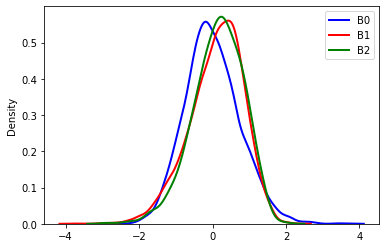

In [201]:
ax=sns.kdeplot(B0,color='b',label='B0',linewidth=2)
ax=sns.kdeplot(B1,color='r',label='B1',linewidth=2)
ax=sns.kdeplot(B2,color='g',label='B2',linewidth=2)
ax.legend()

In [202]:
y_obs0_bar=np.mean(y_obs0)

Sy0 = np.sum(y_obs0*y_obs0)-N0*y_obs0_bar*y_obs0_bar

SEy0= np.sqrt(Sy0/(N0-1))


y_obs1_bar=np.mean(y_obs1)

Sy1 = np.sum(y_obs1*y_obs1)-N1*y_obs1_bar*y_obs1_bar

SEy1= np.sqrt(Sy1/(N1-1))


y_obs2_bar=np.mean(y_obs2)

Sy2 = np.sum(y_obs2*y_obs2)-N2*y_obs2_bar*y_obs2_bar

SEy2= np.sqrt(Sy2/(N2-1))

y=np.concatenate((y_obs0, y_obs1,y_obs2), axis=None) 

Xs=np.concatenate((Xs0,Xs1,Xs2), axis=None) 
print(SEy0)
print(SEy1)
print(SEy2)

0.747124323077865
0.7373120611726668
0.6887650268922246


In [203]:
print(B0.mean())
print(B1.mean())
print(B2.mean())

-0.0008694664802490682
0.10078258883623681
0.1500789963582739


In [204]:
print(np.median(B0))
print(np.median(B1))
print(np.median(B2))

-0.05419834980362731
0.1809730946686161
0.1884167218037669


In [205]:
print(y_obs0_bar)
print(y_obs1_bar)
print(y_obs2_bar)

-0.0009166226877746505
0.10073522510784053
0.15001340238809133


In [206]:
print(np.max(y))
print(np.min(y))
print(np.std(y))
print(np.mean(y))

3.703798881138593
-3.792595220353178
0.7398247147733871
0.0562264191246438


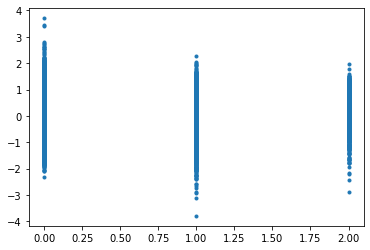

In [207]:
plt.plot(Xs, y,'.')

Parametrs =  0.003946456705260615 [0.08574703]


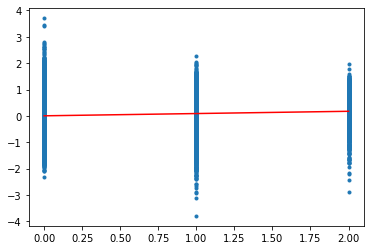

In [208]:
#X=np.concatenate((Xs0, Xs1,Xs2), axis=None) 

lin_reg= sklearn.linear_model.LinearRegression()
lin_reg.fit(np.c_[Xs],y)
print('Parametrs = ', lin_reg.intercept_ ,  lin_reg.coef_)

plt.plot(Xs, y,'.');
plt.plot(np.array([0, 2]), lin_reg.predict(np.c_[np.array([0,2])]), color='r');

In [209]:
X = sm.add_constant(Xs)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     57.08
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.56e-14
Time:                        12:38:34   Log-Likelihood:                -11148.
No. Observations:               10000   AIC:                         2.230e+04
Df Residuals:                    9998   BIC:                         2.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.010      0.390      0.6

In [210]:
est2.pvalues[1]

4.5581547466248456e-14

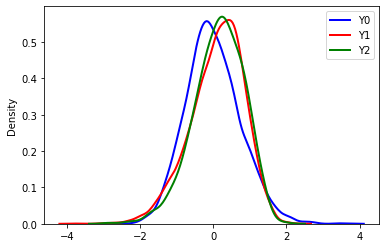

In [211]:
ax=sns.kdeplot(y_obs0,color='b',label='Y0',linewidth=2)
ax=sns.kdeplot(y_obs1,color='r',label='Y1',linewidth=2)
ax=sns.kdeplot(y_obs2,color='g',label='Y2',linewidth=2)
ax.legend()

In [212]:
seedinit4 = seedinit3+1
np.random.seed(seedinit4)
#alpha=np.random.uniform(0,0.05,1) 
Beta0=norm.rvs(loc=y_obs0_bar, scale=SEy0,size=N0)
Beta1=norm.rvs(loc=y_obs1_bar, scale=SEy1,size=N1)
Beta2=norm.rvs(loc=y_obs2_bar, scale=SEy2,size=N2)

In [213]:
seedinit5 = seedinit4+1
np.random.seed(seedinit5)
eps0=np.random.normal(0,0.35,size=N0)
eps1=np.random.normal(0,.35,size=N1)
eps2=np.random.normal(0,.35,size=N2)

In [214]:
y_initi0=Beta0+eps0
y_initi1=Beta1+eps1
y_initi2=Beta2+eps2


kde_y_initi0 = GKDE(y_initi0)
kde_y_initi1 = GKDE(y_initi1)
kde_y_initi2 = GKDE(y_initi2)

In [215]:
## rejection sampling for update ##
def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
    N = r.size 
    #seedinit6 = seedinit5+1
    #np.random.seed(seedinit6)
    reject_prob = np.random.uniform(low=0, high=1, size=N) 
    r = r/np.max(r)
    idx = np.where(r >= reject_prob)[0]
    return idx

In [216]:
r0=np.divide(kde_y_obs0(y_initi0),kde_y_initi0(y_initi0))
r1=np.divide(kde_y_obs1(y_initi1),kde_y_initi1(y_initi1))
r2=np.divide(kde_y_obs2(y_initi2),kde_y_initi2(y_initi2))

In [217]:
samples_to_keep0 = rejection_sampling(r0) # performing rejection sampling
samples_to_keep1 = rejection_sampling(r1)
samples_to_keep2 = rejection_sampling(r2)


accept_rate0 = samples_to_keep0.size/Beta0.shape[0]# computing acceptance rate from performing rejection sampling
accept_rate1 = samples_to_keep1.size/Beta1.shape[0]
accept_rate2 = samples_to_keep2.size/Beta2.shape[0]


print(accept_rate0) # printing acceptance rate 
print()
print(accept_rate1)
print()
print(accept_rate2)
print()

print(np.mean(r0))
print()
print(np.mean(r1))
print()
print(np.mean(r2))

0.44405304600082884

0.6843095742178311

0.8461538461538461

1.0020879011842903

1.0026021521332684

1.0026562473778113


In [218]:
updated_Beta0 =Beta0[samples_to_keep0] # samples from updated parameter density
updated_Beta1 =Beta1[samples_to_keep1]
updated_Beta2 =Beta2[samples_to_keep2]

updated_y0 =y_initi0[samples_to_keep0] # samples from updated QoI density
updated_y1 =y_initi1[samples_to_keep1] 
updated_y2 =y_initi2[samples_to_keep2] 


kde_updated_y0 = GKDE(y_initi0, weights=r0)
kde_updated_y1 = GKDE(y_initi1, weights=r1)
kde_updated_y2 = GKDE(y_initi2, weights=r2) # updated QoI density


kde_updated_Beta0 = GKDE(Beta0, weights=r0)
kde_updated_Beta1 = GKDE(Beta1, weights=r1)
kde_updated_Beta2 = GKDE(Beta2, weights=r2)

In [219]:
updated_eps0 =eps0[samples_to_keep0]
updated_eps1 =eps1[samples_to_keep1] 
updated_eps2 =eps2[samples_to_keep2]

kde_updated_eps0 = GKDE(eps0, weights=r0)
kde_updated_eps1 = GKDE(eps1, weights=r1)
kde_updated_eps2 = GKDE(eps2, weights=r2)

In [220]:
stats.kruskal(updated_Beta0, updated_Beta1, updated_Beta2)

KruskalResult(statistic=66.87889350867044, pvalue=3.002152827797302e-15)

In [169]:
Dunn=sp.posthoc_dunn([updated_Beta0,updated_Beta1,updated_Beta2], p_adjust = 'bonferroni')
Dunn

,1,2,3
1,1.000000e+00,1.693839e-12,2.149037e-09
2,1.693839e-12,1.000000e+00,1.588725e-01
3,2.149037e-09,1.588725e-01,1.000000e+00


In [170]:
sp.posthoc_mannwhitney([updated_Beta0,updated_Beta1,updated_Beta2], p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,2.162456e-12,1.200765e-09
2,2.162456e-12,1.000000e+00,1.985672e-01
3,1.200765e-09,1.985672e-01,1.000000e+00


In [171]:
sp.posthoc_dunn([Beta0,Beta1,Beta2], p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,2.155765e-08,0.000024
2,2.155765e-08,1.000000e+00,0.854493
3,2.356314e-05,8.544935e-01,1.000000


In [172]:
sp.posthoc_dunn([B0,B1,B2], p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,2.348842e-13,8.197399e-11
2,2.348842e-13,1.000000e+00,7.140150e-02
3,8.197399e-11,7.140150e-02,1.000000e+00


In [244]:
nSamp = 10000
nIter = 200
seedinit1 = 1
ac1=np.zeros((nSamp,nIter))
ac2=np.zeros((nSamp,nIter))
CV=np.zeros(nIter)
for j in range(nIter):
    seedinit1 = seedinit1 + j
    np.random.seed(seedinit1)
    CV[j]=np.random.uniform(0.15,0.5,1)
    
    unifc1=np.random.uniform(0,1,nSamp)
    unifc2=np.random.uniform(0,1,nSamp)
    
    for i in range(nSamp):
        if unifc1[i] <= CV[j]:
            ac1[i,j]=1
            
    for k in range(nSamp):
        if unifc2[k] <= CV[j]:
            ac2[k,j]=1
            
Xs=ac1+ac2
Xs.shape

(10000, 200)

In [245]:
N=np.zeros((3,nIter))

for j in range(nIter):
    for i in range(nSamp):
        if Xs[i,j]==0 :
            N[0,j]+= 1
        elif Xs[i,j]==1:
            N[1,j] += 1
        else:
            N[2,j]+= 1

In [246]:
Xs_bar = np.zeros(nIter)
SEb = np.zeros(nIter)
SEe=np.zeros(nIter)
for j in range(nIter):
    Xs_bar[j]=np.mean(Xs[:,j])
    Sxx = np.sum(Xs[:,j]*Xs[:,j])-nSamp*Xs_bar[j]*Xs_bar[j]
    sigma=.9
    SEb[j]= np.sqrt(sigma/Sxx)
    SEe[j]=.9-SEb[j]

In [247]:
B = np.zeros((nSamp,nIter))
e = np.zeros((nSamp,nIter))
y_obs= np.zeros((nSamp,nIter))
seedinit2 = seedinit1+1
for j in range(nIter):    
    seedinit2 = seedinit2+j
    np.random.seed(seedinit2)
    alpha=np.random.uniform(0,0.3,1)
    s=np.random.uniform(0,1.5,1)
    B[0:int(N[0,j]),j] = skewnorm.rvs(1.5,loc=-.6538 , scale=1, size=int(N[0,j]))
    B[int(N[0,j]):int(N[0,j])+int(N[1,j]),j] = skewnorm.rvs(-2.5,loc=.907, scale=1.1, size=int(N[1,j]))
    B[int(N[0,j])+int(N[1,j]):nSamp,j] = skewnorm.rvs(-2, loc=.881 , scale=1, size=int(N[2,j]))
    
    e[0:int(N[0,j]),j]=np.random.normal(0,SEb[j],size=int(N[0,j]))
    e[int(N[0,j]):int(N[0,j])+int(N[1,j]),j]=np.random.normal(0, SEb[j],size=int(N[1,j]))
    e[int(N[1,j])+int(N[0,j]):nSamp,j]=np.random.normal(0,SEb[j],size=int(N[2,j]))
    
y_obs=B+e

In [248]:
y_obs_bar = np.zeros((3,nIter))
SEy=np.zeros((3,nIter))
Sy=np.zeros(3)
for j in range(nIter):
        y_obs_bar[0,j]=np.mean(y_obs[0:int(N[0,j]),j])
        y_obs_bar[1,j]=np.mean(y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
        y_obs_bar[2,j]=np.mean(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])
        Sy[0]= np.sum(y_obs[0:int(N[0,j]),j]*y_obs[0:int(N[0,j]),j])-N[0,j]*y_obs_bar[0,j]*y_obs_bar[0,j]
        Sy[1]= np.sum(y_obs[int(N[0,j]):int(N[0,j])+int(N[1,j]),j]*y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])-N[1,j]*y_obs_bar[1,j]*y_obs_bar[1,j]
        Sy[2]= np.sum(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j]*y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])-N[2,j]*y_obs_bar[2,j]*y_obs_bar[2,j]
        SEy[0,j]= np.sqrt(Sy[0]/(int(N[0,j])-1))
        SEy[1,j]= np.sqrt(Sy[1]/(int(N[1,j])-1))
        SEy[2,j]= np.sqrt(Sy[2]/(int(N[2,j])-1))

In [249]:
Beta = np.zeros((nSamp,nIter))
eps = np.zeros((nSamp,nIter))
y_initi= np.zeros((nSamp,nIter))
seedinit3 = seedinit2+1
for j in range(nIter):    
    seedinit3 = seedinit3+j
    np.random.seed(seedinit3)
    Beta[0:int(N[0,j]),j] = norm.rvs(loc= y_obs_bar[0,j] , scale=SEy[0,j], size=int(N[0,j]))
    Beta[int(N[0,j]):int(N[1,j])+int(N[0,j]),j] = norm.rvs(loc= y_obs_bar[1,j], scale=SEy[1,j], size=int(N[1,j]))
    Beta[int(N[1,j])+int(N[0,j]):nSamp,j] = norm.rvs(loc= y_obs_bar[2,j] , scale=SEy[2,j], size=int(N[2,j]))
    
    eps[0:int(N[0,j]),j]=np.random.normal(0,0.35,size=int(N[0,j]))
    eps[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]=np.random.normal(0,.35,size=int(N[1,j]))
    eps[int(N[1,j])+int(N[0,j]):nSamp,j]=np.random.normal(0,.35,size=int(N[2,j]))
    
y_initi=Beta+eps

In [250]:
r = np.zeros((nSamp,nIter))
for j in range(nIter):
            kde_y_obs0=GKDE(y_obs[0:int(N[0,j]),j])
            kde_y_initi0=GKDE(y_initi[0:int(N[0,j]),j])
            r[0:int(N[0,j]),j]=np.divide(kde_y_obs0(y_initi[0:int(N[0,j]),j]),kde_y_initi0(y_initi[0:int(N[0,j]),j]))
            kde_y_obs1=GKDE(y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
            kde_y_initi1=GKDE(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
            r[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]=np.divide(kde_y_obs1(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]),kde_y_initi1(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]))
            kde_y_obs2=GKDE(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])
            kde_y_initi2=GKDE(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j])
            r[int(N[0,j])+int(N[1,j]):nSamp,j]=np.divide(kde_y_obs2(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j]),kde_y_initi2(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j]))
            

In [251]:
def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
    N = r.size 
    seedinit4 = seedinit3+1
    np.random.seed(seedinit4)
    reject_prob = np.random.uniform(low=0, high=1, size=N) 
    r = r/np.max(r)
    idx = np.where(r >= reject_prob)[0]
    return idx

In [252]:
samples_to_keepSize=np.zeros((3,nIter))
accept_rate=np.zeros((3,nIter))
for j in range(nIter):
    samples_to_keepSize[0,j] = rejection_sampling(r[0:int(N[0,j]),j]).size
    samples_to_keepSize[1,j]=rejection_sampling(r[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]).size
    samples_to_keepSize[2,j] = rejection_sampling(r[int(N[1,j])+int(N[0,j]):nSamp,j]).size


    accept_rate[0,j] = samples_to_keepSize[0,j]/N[0,j]
    accept_rate[1,j] = samples_to_keepSize[1,j]/N[1,j]
    accept_rate[2,j] = samples_to_keepSize[2,j]/N[2,j]

In [253]:
samples_to_keep=np.zeros((nSamp,nIter))

for j in range(nIter):
    samples_to_keep[0:int(samples_to_keepSize[0,j]),j]= rejection_sampling(r[0:int(N[0,j]),j])
    samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j]= rejection_sampling(r[int(N[0,j]):int(N[0,j])+int(N[1,j]),j])+int(N[0,j])
    samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]= rejection_sampling(r[int(N[0,j])+int(N[1,j]):nSamp,j])+int(N[0,j])+int(N[1,j])
    
    

In [254]:
updated_Beta=np.zeros((nSamp,nIter))
updated_y=np.zeros((nSamp,nIter))
updated_eps=np.zeros((nSamp,nIter))
for j in range(nIter):
    updated_Beta[0:int(samples_to_keepSize[0,j]),j] =Beta[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =Beta[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =Beta[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    updated_y[0:int(samples_to_keepSize[0,j]),j] =y_initi[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_y[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =y_initi[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_y[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =y_initi[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    updated_eps[0:int(samples_to_keepSize[0,j]),j] =eps[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_eps[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =eps[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_eps[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =eps[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    

In [255]:
KruskalStatUp=np.zeros(nIter)
KruskalPvalueUp=np.zeros(nIter)
for j in range(nIter):
    KruskalStatUp[j]=stats.kruskal(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[0]
    KruskalPvalueUp[j]=stats.kruskal(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[1]
    

In [256]:
KruskalPvalueUp.max()

0.0001864167999678556

In [257]:
KruskalPvalueUp.min()

1.4750167487829707e-37

In [258]:
(KruskalPvalueUp >.00000005).sum()

12

In [266]:
(200-12)/200

0.94

In [260]:
for j in range(nIter):
    index0=np.where(Xs[:,j] == 0)
    index1=np.where(Xs[:,j] == 1)
    index2=np.where(Xs[:,j] == 2)
    Xs0=Xs[:,j][index0]
    Xs1=Xs[:,j][index1]
    Xs2=Xs[:,j][index2]
    Xs[:,j]=np.concatenate((Xs0,Xs1,Xs2), axis=None) 

In [261]:
#X=np.zeros((nSamp,2))
OLS_Pvalues=np.zeros(nIter)
for j in range(nIter):
    X=sm.add_constant(Xs[:,j])
    est=sm.OLS(y_obs[:,j],X).fit()
    OLS_Pvalues[j]=est.pvalues[1]



In [262]:
OLS_Pvalues.max()

5.997142622036309e-05

In [263]:
(OLS_Pvalues >.00000005).sum()

22

In [267]:
(200-22)/200

0.89

In [268]:
OLS_Pvalues.min()

5.3812616556015693e-33

In [51]:
nSamp = 10000
nIter = 200
seedinit1 = 1
ac1=np.zeros((nSamp,nIter))
ac2=np.zeros((nSamp,nIter))
CV=np.zeros(nIter)
for j in range(nIter):
    seedinit1 = seedinit1 + j
    np.random.seed(seedinit1)
    CV[j]=np.random.uniform(0.15,0.5,1)
    
    unifc1=np.random.uniform(0,1,nSamp)
    unifc2=np.random.uniform(0,1,nSamp)
    
    for i in range(nSamp):
        if unifc1[i] <= CV[j]:
            ac1[i,j]=1
            
    for k in range(nSamp):
        if unifc2[k] <= CV[j]:
            ac2[k,j]=1
            
X=ac1+ac2
X.shape

(10000, 200)

In [52]:
OLSPvalues=np.zeros(nIter)
kruskalPvalues=np.zeros(nIter)

for j in range(nIter):
    
    Xs=X[:,j]
    
    X_bar=np.mean(Xs)
    Sxx = np.sum(Xs*Xs)-nSamp*X_bar*X_bar
    sigma=1.7
    SEb= np.sqrt(sigma/Sxx)
    SEe=1.7-SEb
    
    N0=0
    N1=0
    N2=0
    for i in range(nSamp):
        if Xs[i]==0 :
            N0=N0+1
        elif Xs[i]==1:
            N1=N1+1
        else:
            N2=N2+1
    
    B0= skewnorm.rvs(-1.7,loc=3.22 , scale=4.5, size=N0)
    B1= skewnorm.rvs(-.7,loc=-.9, scale=4.5, size=N1)
    B2= skewnorm.rvs(1.7,loc=-1.4 , scale=4.5, size=N2)

    e0=np.random.normal(0,SEb,size=N0)
    e1=np.random.normal(0,SEb,size=N1)
    e2=np.random.normal(0,SEb,size=N2)

    y_obs0=B0+e0
    y_obs1=B1+e1
    y_obs2=B2+e2

    index0=np.where(Xs == 0)
    index1=np.where(Xs == 1)
    index2=np.where(Xs == 2)

    X0=Xs[index0]
    X1=Xs[index1]
    X2=Xs[index2]

    y_obs0=y[index0]
    y_obs1=y[index1]
    y_obs2=y[index2]
    
    kde_y_obs0= GKDE(y_obs0)
    kde_y_obs1= GKDE(y_obs1)
    kde_y_obs2= GKDE(y_obs2)
    

    y_obs0_bar=np.mean(y_obs0)
    Sy0 = np.sum(y_obs0*y_obs0)-N0*y_obs0_bar*y_obs0_bar
    SEy0= np.sqrt(Sy0/(N0-1))
    
    y_obs1_bar=np.mean(y_obs1)
    Sy1 = np.sum(y_obs1*y_obs1)-N1*y_obs1_bar*y_obs1_bar
    SEy1= np.sqrt(Sy1/(N1-1))
    
    y_obs2_bar=np.mean(y_obs2)
    Sy2 = np.sum(y_obs2*y_obs2)-N2*y_obs2_bar*y_obs2_bar
    SEy2= np.sqrt(Sy2/(N2-1))
    
    y=np.concatenate((y_obs0, y_obs1,y_obs2), axis=None) 
    Xs=np.concatenate((X0,X1,X2), axis=None)
    
        
    Xa = sm.add_constant(Xs)
    est = sm.OLS(y, Xa,missing='drop')  #sm.OLS(y , sm.add_constant(Xs)).fit()
    est2 = est.fit()
    OLSPvalues[j]=est2.pvalues[1]
    
    Beta0=norm.rvs(loc=y_obs0_bar, scale=SEy0,size=N0)
    Beta1=norm.rvs(loc=y_obs1_bar, scale=SEy1,size=N1)
    Beta2=norm.rvs(loc=y_obs2_bar, scale=SEy2,size=N2)
    
    eps0=np.random.normal(0,.4,size=N0)
    eps1=np.random.normal(0,.4,size=N1)
    eps2=np.random.normal(0,.4,size=N2)
    
    y_initi0=Beta0+eps0
    y_initi1=Beta1+eps1
    y_initi2=Beta2+eps2


    kde_y_initi0 = GKDE(y_initi0)
    kde_y_initi1 = GKDE(y_initi1)
    kde_y_initi2 = GKDE(y_initi2)
    
    def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
        N = r.size 

        reject_prob = np.random.uniform(low=0, high=1, size=N) 
        r = r/np.max(r)
        idx = np.where(r >= reject_prob)[0]
        return idx

    r0=np.divide(kde_y_obs0(y_initi0),kde_y_initi0(y_initi0))
    r1=np.divide(kde_y_obs1(y_initi1),kde_y_initi1(y_initi1))
    r2=np.divide(kde_y_obs2(y_initi2),kde_y_initi2(y_initi2))
    samples_to_keep0 = rejection_sampling(r0) # performing rejection sampling
    samples_to_keep1 = rejection_sampling(r1)
    samples_to_keep2 = rejection_sampling(r2)
    
    updated_Beta0 =Beta0[samples_to_keep0] # samples from updated parameter density
    updated_Beta1 =Beta1[samples_to_keep1]
    updated_Beta2 =Beta2[samples_to_keep2]
    

    kruskal=stats.kruskal(updated_Beta0, updated_Beta1, updated_Beta2)
    
    
    kruskalPvalues[j]=kruskal[1]


    

KeyboardInterrupt: 

In [ ]:
kruskalPvalues.max()

In [ ]:
OLSPvalues.max()

In [1402]:
OLSPvalues.min()

0.007296931215284516

In [677]:
kruskalPvalues.min()

1.8444398181324187e-06

In [235]:

    Xs=X[:,0]
    
    X_bar=np.mean(Xs)
    Sxx = np.sum(Xs*Xs)-nSamp*X_bar*X_bar
    sigma=1.7
    SEb= np.sqrt(sigma/Sxx)
    SEe=1.7-SEb
    
    N0=0
    N1=0
    N2=0
    for i in range(nSamp):
        if Xs[i]==0 :
            N0=N0+1
        elif Xs[i]==1:
            N1=N1+1
        else:
            N2=N2+1
    
    B0= skewnorm.rvs(-1.7,loc=3.22 , scale=4.5, size=N0)
    B1= skewnorm.rvs(-.7,loc=-.9, scale=4.5, size=N1)
    B2= skewnorm.rvs(1.7,loc=-1.4 , scale=4.5, size=N2)

    e0=np.random.normal(0,SEb,size=N0)
    e1=np.random.normal(0,SEb,size=N1)
    e2=np.random.normal(0,SEb,size=N2)

    y_obs0=B0+e0
    y_obs1=B1+e1
    y_obs2=B2+e2

    index0=np.where(Xs == 0)
    index1=np.where(Xs == 1)
    index2=np.where(Xs == 2)

    X0=Xs[index0]
    X1=Xs[index1]
    X2=Xs[index2]

    y_obs0=y[index0]
    y_obs1=y[index1]
    y_obs2=y[index2]
    
    kde_y_obs0= GKDE(y_obs0)
    kde_y_obs1= GKDE(y_obs1)
    kde_y_obs2= GKDE(y_obs2)
    

    y_obs0_bar=np.mean(y_obs0)
    Sy0 = np.sum(y_obs0*y_obs0)-N0*y_obs0_bar*y_obs0_bar
    SEy0= np.sqrt(Sy0/(N0-1))
    
    y_obs1_bar=np.mean(y_obs1)
    Sy1 = np.sum(y_obs1*y_obs1)-N1*y_obs1_bar*y_obs1_bar
    SEy1= np.sqrt(Sy1/(N1-1))
    
    y_obs2_bar=np.mean(y_obs2)
    Sy2 = np.sum(y_obs2*y_obs2)-N2*y_obs2_bar*y_obs2_bar
    SEy2= np.sqrt(Sy2/(N2-1))
    
    y=np.concatenate((y_obs0, y_obs1,y_obs2), axis=None) 
    Xs=np.concatenate((X0,X1,X2), axis=None)
    
        
    Xa = sm.add_constant(Xs)
    est = sm.OLS(y, Xa,missing='drop')  #sm.OLS(y , sm.add_constant(Xs)).fit()
    est2 = est.fit()
    OLSPvalues=est2.pvalues[1]
    
    Beta0=norm.rvs(loc=y_obs0_bar, scale=SEy0,size=N0)
    Beta1=norm.rvs(loc=y_obs1_bar, scale=SEy1,size=N1)
    Beta2=norm.rvs(loc=y_obs2_bar, scale=SEy2,size=N2)
    
    eps0=np.random.normal(0,.4,size=N0)
    eps1=np.random.normal(0,.4,size=N1)
    eps2=np.random.normal(0,.4,size=N2)
    
    y_initi0=Beta0+eps0
    y_initi1=Beta1+eps1
    y_initi2=Beta2+eps2


    kde_y_initi0 = GKDE(y_initi0)
    kde_y_initi1 = GKDE(y_initi1)
    kde_y_initi2 = GKDE(y_initi2)
    
    def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
        N = r.size 

        reject_prob = np.random.uniform(low=0, high=1, size=N) 
        r = r/np.max(r)
        idx = np.where(r >= reject_prob)[0]
        return idx

    r0=np.divide(kde_y_obs0(y_initi0),kde_y_initi0(y_initi0))
    r1=np.divide(kde_y_obs1(y_initi1),kde_y_initi1(y_initi1))
    r2=np.divide(kde_y_obs2(y_initi2),kde_y_initi2(y_initi2))
    samples_to_keep0 = rejection_sampling(r0) # performing rejection sampling
    samples_to_keep1 = rejection_sampling(r1)
    samples_to_keep2 = rejection_sampling(r2)
    
    updated_Beta0 =Beta0[samples_to_keep0] # samples from updated parameter density
    updated_Beta1 =Beta1[samples_to_keep1]
    updated_Beta2 =Beta2[samples_to_keep2]
    

    kruskal=stats.kruskal(updated_Beta0, updated_Beta1, updated_Beta2)
    
   


    

In [236]:
kruskal

KruskalResult(statistic=3.6611446178249025, pvalue=0.16032178792637475)

In [237]:
OLSPvalues

0.44183254650240067

In [238]:
Xs


array([0., 0., 0., ..., 2., 2., 2.])

In [239]:
y

array([0.12583374, 3.9285296 , 1.79115299, ..., 0.53208147, 0.0598782 ,
       4.85822147])